In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(60000, 28, 28)


In [2]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2542 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1026 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9815
test_acc:  0.9815000295639038


(28, 28)


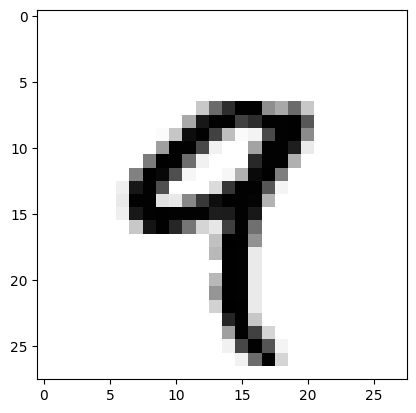

In [7]:
digit=train_images[4].reshape(28,28)
import matplotlib.pyplot as plt
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,[sequence]]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

[0. 1. 1. ... 0. 0. 0.]


In [9]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train, 
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5336 - accuracy: 0.7742 - val_loss: 0.4164 - val_accuracy: 0.8517
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3337 - accuracy: 0.8919 - val_loss: 0.3205 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2499 - accuracy: 0.9174 - val_loss: 0.2886 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2007 - accuracy: 0.9334 - val_loss: 0.2756 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1687 - accuracy: 0.9445 - val_loss: 0.2743 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1420 - accuracy: 0.9544 - val_loss: 0.2823 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1199 - accuracy: 0.9627 - val_loss: 0.3090 - val_accuracy: 0.8777
Epoch 8/20
30/30 

In [11]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

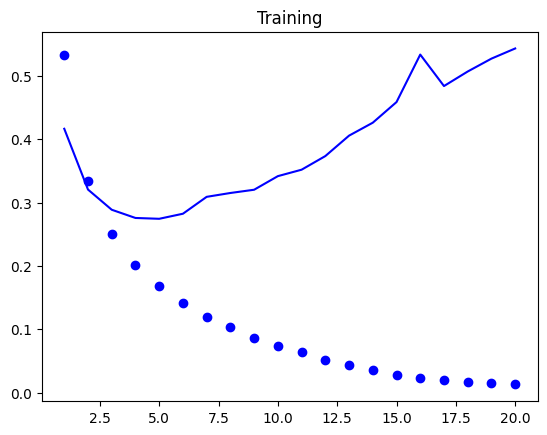

In [14]:
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss'] # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
val_loss=history_dict['val_loss']
epochs=range(1, len(loss)+1)
plt.title('Training')
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.show()


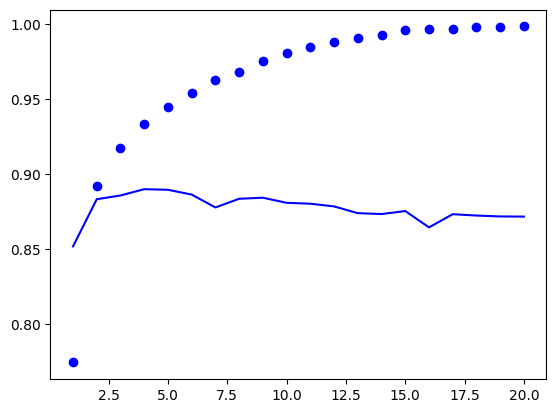

In [18]:
plt.clf()
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.show()

In [ ]:
# epoch 5회 부터 과적합 발생 확인. 그래서 epoch 4까지만 한다.

In [23]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4728 - accuracy: 0.8073
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.9011
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2176 - accuracy: 0.9204
Epoch 4/4
782/782 [==============================] - 1s 771us/step - loss: 0.2820 - accuracy: 0.8876
[0.28197282552719116, 0.8876399993896484]


In [24]:
print(model.predict(x_test))

782/782 [==============================] - 1s 645us/step
[[0.2284265 ]
 [0.9990193 ]
 [0.8113291 ]
 ...
 [0.09248963]
 [0.07100106]
 [0.51602554]]
